In [97]:
import numpy as np
import pandas as pd
import csv
import plotnine
from plotnine import *

In [2]:
money = pd.read_csv("4.2.17_근로소득_연말정산_기부금_세액공제_현황2017_20230320000051.csv", encoding= "cp949")
money

,과세대상근로소득규모별(1),과세대상근로소득규모별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
0,과세대상근로소득규모별(1),과세대상근로소득규모별(2),정치자금기부금,정치자금기부금,법정기부금,법정기부금,우리사주조합기부금,우리사주조합기부금,지정기부금(종교단체외),지정기부금(종교단체외),지정기부금(종교단체),지정기부금(종교단체)
1,과세대상근로소득규모별(1),과세대상근로소득규모별(2),인원 (명),공제세액 (백만원),인원 (명),공제세액 (백만원),인원 (명),공제세액 (백만원),인원 (명),공제세액 (백만원),인원 (명),공제세액 (백만원)
2,합계,소계,306812,20061,1916727,61746,6064,776,4336405,393884,1681109,835718
3,결정세액이 있는자,소계,297253,19125,1831351,55281,5631,743,4096866,375430,1458494,793432
4,결정세액이 있는자,1천만 이하,-,-,-,-,-,-,-,-,-,-
5,결정세액이 있는자,1.5천만 이하,95,0,118,0,-,-,86,4,69,7
6,결정세액이 있는자,2천만 이하,2809,31,4735,21,14,-,7417,207,3419,377
7,결정세액이 있는자,3천만 이하,33658,676,87328,562,242,10,211263,8049,53684,7940
8,결정세액이 있는자,4천만 이하,35482,1290,185970,1585,740,45,437998,22180,125196,33605
9,결정세액이 있는자,4.5천만 이하,17614,798,110588,1174,635,41,273919,16733,84017,28221


In [3]:
money_religion = money.iloc[4:19,[1,10,11]]
money_religion

,과세대상근로소득규모별(2),2021.8,2021.9
4,1천만 이하,-,-
5,1.5천만 이하,69,7
6,2천만 이하,3419,377
7,3천만 이하,53684,7940
8,4천만 이하,125196,33605
9,4.5천만 이하,84017,28221
10,5천만 이하,91644,34208
11,6천만 이하,189727,79514
12,8천만 이하,348044,170865
13,1억 이하,257014,149441


In [4]:
money_religion.columns = ['Tax_amount', '인원', '지정기부금']

In [5]:
money_religion = money_religion.set_index('Tax_amount')

In [6]:
money_religion.iloc[0,[0,1]] = 0

In [7]:
df_money = money_religion.apply(pd.to_numeric)

In [8]:
df_money.dtypes

인원       int64
지정기부금    int64
dtype: object

In [9]:
each = ((df_money['지정기부금']*1000000) / df_money['인원']).round(0)

In [10]:
each

Tax_amount
1천만 이하            NaN
1.5천만 이하     101449.0
2천만 이하       110266.0
3천만 이하       147903.0
4천만 이하       268419.0
4.5천만 이하     335896.0
5천만 이하       373270.0
6천만 이하       419097.0
8천만 이하       490929.0
1억 이하        581451.0
2억 이하        785924.0
3억 이하       1473082.0
5억 이하       2209664.0
10억 이하      3684618.0
10억 초과      8472961.0
dtype: float64

In [11]:
money_religion0 = pd.concat([df_money, each], axis = 1)
money_religion0.columns = [ '인원', '지정기부금', 'Donation_per']

In [12]:
money = money_religion0.reset_index()

In [13]:
money

,Tax_amount,인원,지정기부금,Donation_per
0,1천만 이하,0,0,NaN
1,1.5천만 이하,69,7,101449.0
2,2천만 이하,3419,377,110266.0
3,3천만 이하,53684,7940,147903.0
4,4천만 이하,125196,33605,268419.0
5,4.5천만 이하,84017,28221,335896.0
6,5천만 이하,91644,34208,373270.0
7,6천만 이하,189727,79514,419097.0
8,8천만 이하,348044,170865,490929.0
9,1억 이하,257014,149441,581451.0


세금으로 인해 추산된 금액만 835718000000원 (8천억원) 규모이며, 한 사람당 위와 같은 경제적 가치를 가지고 있다.   
즉, 교회에게 한 사람 한 사람은 경제적 가치를 창출할 수 있는 수단이자 주 수입원이다. 

In [14]:
import plotnine
from plotnine import *

C:\Users\Samsung\anaconda3\lib\site-packages\plotnine\layer.py:391: PlotnineWarning: position_stack : Removed 1 rows containing missing values.


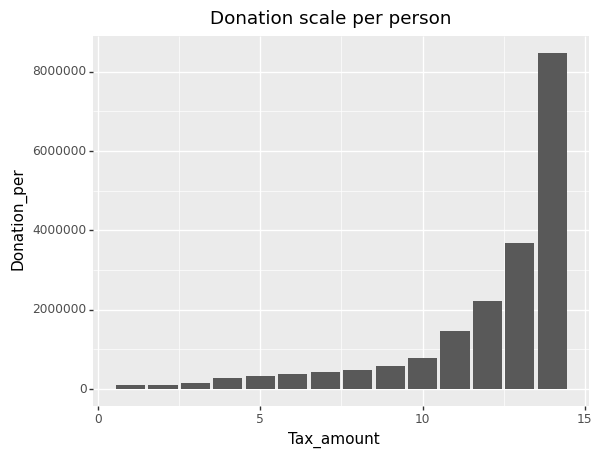

<ggplot: (162026382830)>

In [25]:
df = pd.DataFrame({
    'Tax_amount':list(range(15)),
    'Donation_per': money['Donation_per'],
    'letter' : money['Tax_amount']
})

(ggplot(df)
 + geom_col(aes(x='Tax_amount',y='Donation_per'))         
 + ggtitle('Donation scale per person ')
)

결정세액의 규모가 커질수록 종교에 납부하는 금액의 크기가 급격히 증가한다. 

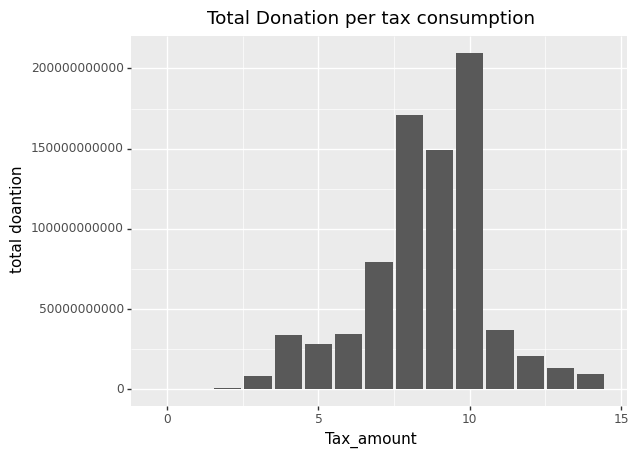

<ggplot: (162026753808)>

In [28]:
df = pd.DataFrame({
    'Tax_amount':list(range(15)),
    'total doantion': money['지정기부금']*1000000,
    'letter' : money['Tax_amount']
})

(ggplot(df)
 + geom_col(aes(x='Tax_amount',y='total doantion'))         
 + ggtitle('Total Donation per tax consumption')
)

---

# 다양한 역학 및 종교기관 기부 경험

In [29]:
money = pd.read_csv("종교기관_기부_경험과_기부횟수_및_기부금액_20230320000008.csv", encoding= "cp949")
money

,특성별(1),특성별(2),2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2020.10
0,특성별(1),특성별(2),경험 없음 (%),경험 있음 (%),기부횟수,기부횟수,기부횟수,기부횟수,기부금액,기부금액,기부금액,기부금액,기부금액
1,특성별(1),특성별(2),소계,소계,평균(연) (회),분기별 1회 미만 (%),분기별 1회~4회 미만 (%),월1회 이상 (%),평균 (만원),5만원 미만 (%),5~10만원 미만 (%),10~50만원 미만 (%),50만원 이상 (%)
2,전체,소계,60.5,39.5,9.1,71.1,25.6,3.3,71.4,5.2,8.4,42.0,44.4
3,성별,남,76.0,24.0,8.2,80.3,19.7,0.0,161.4,0.0,0.0,32.5,67.5
4,성별,여,54.6,45.4,9.3,67.7,27.8,4.5,53.6,6.3,10.0,43.9,39.8
5,연령별,15-19세,100.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,연령별,20-29세,100.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,연령별,30-39세,85.0,15.0,17.5,85.0,10.4,4.6,67.1,0.0,0.0,30.5,69.5
8,연령별,40-49세,58.4,41.6,6.0,77.2,22.8,0.0,78.1,27.0,0.0,29.5,43.5
9,연령별,50-59세,60.2,39.8,6.3,77.3,22.7,0.0,59.6,5.8,13.1,29.0,52.1


---

# 종교적 자유 보장 수준

In [29]:
df = pd.read_csv("종교의_자유_보장수준_20230319235222.csv", encoding= "cp949")
df

,응답자유형별(1),응답자유형별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7
0,응답자유형별(1),응답자유형별(2),학교 종교행사에 원하는 학생만 참여한다,학교 종교행사에 원하는 학생만 참여한다,학교 종교행사에 원하는 학생만 참여한다,학교 종교행사에 원하는 학생만 참여한다,나는 부모형제와 상관없이 원하는 종교를 가질 수 있다,나는 부모형제와 상관없이 원하는 종교를 가질 수 있다,나는 부모형제와 상관없이 원하는 종교를 가질 수 있다,나는 부모형제와 상관없이 원하는 종교를 가질 수 있다
1,응답자유형별(1),응답자유형별(2),전혀 그렇지 않다,그렇지 않은 편이다,그런 편이다,매우 그렇다,전혀 그렇지 않다,그렇지 않은 편이다,그런 편이다,매우 그렇다
2,전체,소계,26.4,22.8,29.5,21.3,5.4,12.6,37.3,44.7
3,성별,남자,24.4,24.9,25.0,25.6,6.9,11.8,36.0,45.3
4,성별,여자,27.7,21.3,32.8,18.2,4.1,13.3,38.5,44.1
5,학교급,중학교,50.4,17.8,17.8,14.0,6.7,14.0,38.2,41.1
6,학교급,고등학교,22.1,23.7,31.6,22.6,4.1,11.1,36.3,48.5
7,고교유형,일반계고,22.8,23.6,29.7,23.9,3.9,11.4,35.3,49.4
8,고교유형,특성화계고,20.3,23.8,37.1,18.7,4.9,9.9,40.5,44.7
9,지역규모,대도시,23.6,25.4,31.9,19.2,5.9,11.1,36.4,46.7


In [34]:
df.columns = ['type', 'group', 'school_1', 'school_2', 'school_3', 'school_4', 'family_1', 'family_2', 'family_3', 'family_4']

In [77]:
data = df.iloc[2:, :].set_index(['type','group'])
data

school_1 school_2 school_3 school_4 family_1 family_2 family_3  \
type   group                                                                  
전체     소계        26.4     22.8     29.5     21.3      5.4     12.6     37.3   
성별     남자        24.4     24.9     25.0     25.6      6.9     11.8     36.0   
       여자        27.7     21.3     32.8     18.2      4.1     13.3     38.5   
학교급    중학교       50.4     17.8     17.8     14.0      6.7     14.0     38.2   
       고등학교      22.1     23.7     31.6     22.6      4.1     11.1     36.3   
고교유형   일반계고      22.8     23.6     29.7     23.9      3.9     11.4     35.3   
       특성화계고     20.3     23.8     37.1     18.7      4.9      9.9     40.5   
지역규모   대도시       23.6     25.4     31.9     19.2      5.9     11.1     36.4   
       중소도시      37.4     25.3     24.0     13.3      5.3     13.6     38.0   
       읍면지역       0.0      5.3     39.4     55.3      4.7     13.3     37.4   
가족유형   양부모가정     25.9     23.1     29.7     21.2      5.1     12.6     37.3   
       한부모가정     25.5     22.8     27.7     24.1      6.6     10.8     37.5   
       조손가정      44.1      0.0     55.9      0.0     20.3     20.0     23.5   
       기타        46.3      9.9     25.9     17.9      5.7     18.4     42.8   
학업성적   상         33.0     26.8     25.4     14.8      3.7     11.6     34.2   
       중         26.5     20.3     29.0     24.2      5.9     13.0     38.3   
       하         21.1     23.8     33.9     21.2      6.3     12.8     38.6   
경제적 수준 상         31.8     21.2     26.3     20.8      5.1     12.5     35.4   
       중         21.6     24.3     32.8     21.4      5.4     11.8     40.3   
       하         20.7     24.9     32.7     21.7      7.4     15.4     34.1   

             family_4  
type   group           
전체     소계        44.7  
성별     남자        45.3  
       여자        44.1  
학교급    중학교       41.1  
       고등학교      48.5  
고교유형   일반계고      49.4  
       특성화계고     44.7  
지역규모   대도시       46.7  
       중소도시      43.0  
       읍면지역      44.7  
가족유형   양부모가정     44.9  
       한부모가정     45.1  
       조손가정      36.2  
       기타        33.1  
학업성적   상         50.5  
       중         42.8  
       하         42.2  
경제적 수준 상         47.0  
       중         42.5  
       하         43.1

In [78]:
### 학교 종교행사에 원하는 학생만 참여한다

In [119]:
school = data.filter(regex='school').stack().to_frame().reset_index().rename(columns = {'level_2':'scale', 0 :'rate'})
school

,type,group,scale,rate
0,전체,소계,school_1,26.4
1,전체,소계,school_2,22.8
2,전체,소계,school_3,29.5
3,전체,소계,school_4,21.3
4,성별,남자,school_1,24.4
...,...,...,...,...
75,경제적 수준,중,school_4,21.4
76,경제적 수준,하,school_1,20.7
77,경제적 수준,하,school_2,24.9
78,경제적 수준,하,school_3,32.7


In [136]:
df = school[school['type'].str.contains('학업성적')].loc[school.scale== 'school_1',:]
df['rate'] = df['rate'].apply(pd.to_numeric)
df['group'] = ['high', 'mid', 'low']
df

,type,group,scale,rate
56,학업성적,high,school_1,33.0
60,학업성적,mid,school_1,26.5
64,학업성적,low,school_1,21.1


In [137]:
df['rate'].dtypes

dtype('float64')

학교 종교 행사에 원하는 학생만 참여하냐는 질문에 **전혀그렇지 않다(1점)** 을 선택한 학생들의 경제적 수준 

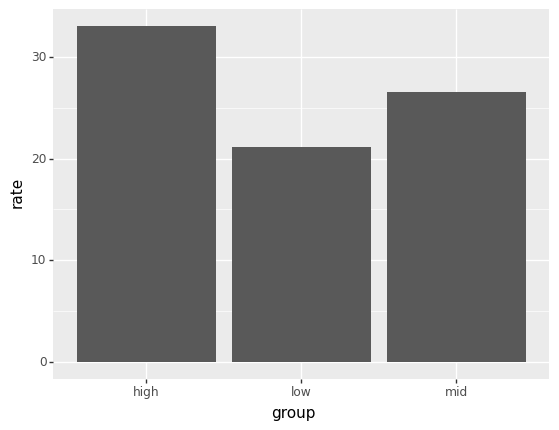

<ggplot: (133890476614)>

In [146]:
(ggplot(df,aes(x= "group", y="rate"))+ geom_bar(stat="identity"))

학없 성적이 높은 학생일수록 종교적 선택을 강요받는 학생의 비율이 높게 나타남. 

In [41]:
### 나는 부모형제와 상관없이 원하는 종교를 가질 수 있다. 

In [147]:
family = data.filter(regex='family').stack().to_frame().reset_index().rename(columns = {'level_2':'scale', 0 :'rate'})
family

,type,group,scale,rate
0,전체,소계,family_1,5.4
1,전체,소계,family_2,12.6
2,전체,소계,family_3,37.3
3,전체,소계,family_4,44.7
4,성별,남자,family_1,6.9
...,...,...,...,...
75,경제적 수준,중,family_4,42.5
76,경제적 수준,하,family_1,7.4
77,경제적 수준,하,family_2,15.4
78,경제적 수준,하,family_3,34.1


In [156]:
df = family[family['type'].str.contains('가족유형')].loc[family.scale== 'family_1',:]
df['rate'] = df['rate'].apply(pd.to_numeric)
df['group'] = ['both', 'one_side', 'grand', 'others']
df

,type,group,scale,rate
40,가족유형,both,family_1,5.1
44,가족유형,one_side,family_1,6.6
48,가족유형,grand,family_1,20.3
52,가족유형,others,family_1,5.7


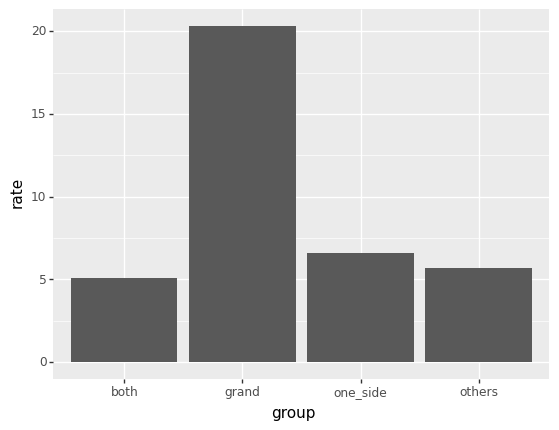

<ggplot: (133890599027)>

In [157]:
(ggplot(df,aes(x= "group", y="rate"))+ geom_bar(stat="identity"))

조손가정 > 한부모 가정 > 양부모 가정 순으로 종교적 선택의 강요가 높았음. 

----

# 종교적 차별 정도

In [149]:
pd.read_csv("차별_경험의_유형_20230319235835.csv", encoding= "cp949")

,특성별(1),특성별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,...,2021.50,2021.51,2021.52,2021.53,2021.54,2021.55,2021.56,2021.57,2021.58,2021.59
0,특성별(1),특성별(2),성별,성별,성별,성별,임신/출산,임신/출산,임신/출산,임신/출산,...,가족상황,가족상황,질병/병력,질병/병력,질병/병력,질병/병력,출신지역,출신지역,출신지역,출신지역
1,특성별(1),특성별(2),신체적/언어적 폭력,일자리 관련 차별,물건을 사거나 시설 이용 시 차별,따돌림이나 배제,신체적/언어적 폭력,일자리 관련 차별,물건을 사거나 시설 이용 시 차별,따돌림이나 배제,...,물건을 사거나 시설 이용 시 차별,따돌림이나 배제,신체적/언어적 폭력,일자리 관련 차별,물건을 사거나 시설 이용 시 차별,따돌림이나 배제,신체적/언어적 폭력,일자리 관련 차별,물건을 사거나 시설 이용 시 차별,따돌림이나 배제
2,전체,소계,36.3,44.3,28.6,7.1,14.4,73.6,15.9,7.6,...,18.1,33.5,16.3,38.0,24.6,32.2,27.0,37.0,13.5,34.0
3,성별,남자,30.8,39.3,42.1,6.2,-,-,-,-,...,18.8,34.3,18.7,32.8,26.3,31.1,23.4,42.3,12.9,32.9
4,성별,여자,38.6,46.4,22.7,7.5,14.4,73.6,15.9,7.6,...,17.7,32.9,13.7,43.8,22.6,33.3,30.6,31.5,14.1,35.2
5,지역별,도시(동부),36.5,44.8,28.5,6.7,15.9,73.6,16.4,6.2,...,19.5,30.5,18.4,39.1,23.8,28.0,29.1,36.2,12.6,32.0
6,지역별,농어촌(읍면부),34.1,39.9,29.1,10.9,1.3,73.8,11.2,19.9,...,7.7,55.9,4.5,32.0,28.9,55.4,13.9,42.2,18.7,46.7
7,연령별,20대 이하,39.8,40.8,31.4,7.7,11.2,82.5,5.1,9.3,...,12.0,48.8,14.6,44.5,18.4,35.3,28.7,23.4,25.4,34.7
8,연령별,30대,37.0,51.5,23.8,6.9,12.8,69.9,21.3,8.5,...,12.2,27.4,25.4,37.6,15.4,34.3,22.7,41.9,14.3,32.8
9,연령별,40대,30.6,46.8,26.4,5.1,16.6,78.8,11.3,4.1,...,18.9,21.2,14.7,48.4,26.0,21.0,41.8,44.3,7.0,15.9
